'''mytalib'''
http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [9]:
df

,A,B,C,D
2013-01-01,0.378514,-0.956269,-0.938694,2.726444
2013-01-02,0.560521,0.506619,-1.330371,-0.496881
2013-01-03,0.899048,-0.945214,-0.279776,1.111682
2013-01-04,-0.477241,-1.332911,-0.301220,-0.565334
2013-01-05,-0.891524,0.776800,0.661212,-1.418969
2013-01-06,-1.203700,1.646040,0.030165,-0.857225


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [7]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [8]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [9]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [10]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [11]:
df.head()

,A,B,C,D
2013-01-01,-0.586651,-1.327171,-0.133624,0.495427
2013-01-02,0.170896,0.869656,1.180486,0.952258
2013-01-03,0.245435,-0.982813,1.117219,-1.680767
2013-01-04,0.226073,0.577531,-1.832417,0.137461
2013-01-05,-0.748915,0.460678,-0.620514,0.828932


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,0.226073,0.577531,-1.832417,0.137461
2013-01-05,-0.748915,0.460678,-0.620514,0.828932
2013-01-06,-0.162660,-0.439892,-0.365733,0.337229


Display the index, columns, and the underlying numpy data

In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df.values

array([[-0.58665111, -1.32717142, -0.13362437,  0.49542749],
       [ 0.17089559,  0.8696562 ,  1.1804856 ,  0.95225827],
       [ 0.24543459, -0.98281277,  1.11721879, -1.6807667 ],
       [ 0.22607343,  0.57753072, -1.83241702,  0.13746122],
       [-0.74891531,  0.46067787, -0.6205144 ,  0.82893182],
       [-0.1626598 , -0.43989195, -0.36573315,  0.33722912]])

Describe shows a quick statistic summary of your data

In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.142637,-0.140335,-0.109097,0.178424
std,0.435884,0.906059,1.137077,0.959787
min,-0.748915,-1.327171,-1.832417,-1.680767
25%,-0.480653,-0.847083,-0.556819,0.187403
50%,0.004118,0.010393,-0.249679,0.416328
75%,0.212279,0.548318,0.804508,0.745556
max,0.245435,0.869656,1.180486,0.952258


Transposing your data

In [17]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.586651,0.170896,0.245435,0.226073,-0.748915,-0.162660
B,-1.327171,0.869656,-0.982813,0.577531,0.460678,-0.439892
C,-0.133624,1.180486,1.117219,-1.832417,-0.620514,-0.365733
D,0.495427,0.952258,-1.680767,0.137461,0.828932,0.337229


Sorting by an axis

In [18]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.495427,-0.133624,-1.327171,-0.586651
2013-01-02,0.952258,1.180486,0.869656,0.170896
2013-01-03,-1.680767,1.117219,-0.982813,0.245435
2013-01-04,0.137461,-1.832417,0.577531,0.226073
2013-01-05,0.828932,-0.620514,0.460678,-0.748915
2013-01-06,0.337229,-0.365733,-0.439892,-0.162660


Sorting by value

In [19]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-0.586651,-1.327171,-0.133624,0.495427
2013-01-03,0.245435,-0.982813,1.117219,-1.680767
2013-01-06,-0.162660,-0.439892,-0.365733,0.337229
2013-01-05,-0.748915,0.460678,-0.620514,0.828932
2013-01-04,0.226073,0.577531,-1.832417,0.137461
2013-01-02,0.170896,0.869656,1.180486,0.952258


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [20]:
df['A']

2013-01-01   -0.586651
2013-01-02    0.170896
2013-01-03    0.245435
2013-01-04    0.226073
2013-01-05   -0.748915
2013-01-06   -0.162660
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [21]:
df[0:3]

,A,B,C,D
2013-01-01,-0.586651,-1.327171,-0.133624,0.495427
2013-01-02,0.170896,0.869656,1.180486,0.952258
2013-01-03,0.245435,-0.982813,1.117219,-1.680767


In [22]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.170896,0.869656,1.180486,0.952258
2013-01-03,0.245435,-0.982813,1.117219,-1.680767
2013-01-04,0.226073,0.577531,-1.832417,0.137461


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [23]:
df.loc[dates[0]]

A   -0.586651
B   -1.327171
C   -0.133624
D    0.495427
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [27]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.378514,-0.956269
2013-01-02,0.560521,0.506619
2013-01-03,0.899048,-0.945214
2013-01-04,-0.477241,-1.332911
2013-01-05,-0.891524,0.776800
2013-01-06,-1.203700,1.646040


Showing label slicing, both endpoints are included

In [28]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.560521,0.506619
2013-01-03,0.899048,-0.945214
2013-01-04,-0.477241,-1.332911


Reduction in the dimensions of the returned object

In [29]:
df.loc['20130102',['A','B']]

A    0.560521
B    0.506619
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [30]:
df.loc[dates[0],'A']

0.37851390237437504

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [24]:
df.iloc[3]

A    0.226073
B    0.577531
C   -1.832417
D    0.137461
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [25]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.226073,0.577531
2013-01-05,-0.748915,0.460678


By lists of integer position locations, similar to the numpy/python style

In [26]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.170896,1.180486
2013-01-03,0.245435,1.117219
2013-01-05,-0.748915,-0.620514


For slicing rows explicitly

In [27]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.170896,0.869656,1.180486,0.952258
2013-01-03,0.245435,-0.982813,1.117219,-1.680767


For slicing columns explicitly

In [28]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.327171,-0.133624
2013-01-02,0.869656,1.180486
2013-01-03,-0.982813,1.117219
2013-01-04,0.577531,-1.832417
2013-01-05,0.460678,-0.620514
2013-01-06,-0.439892,-0.365733


For getting a value explicitly

In [36]:
df.iloc[1,1]

0.506618541002796

For getting fast access to a scalar (equiv to the prior method)

In [37]:
df.iat[1,1]

0.506618541002796

## Boolean Indexing

Using a single column’s values to select data.

In [29]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.170896,0.869656,1.180486,0.952258
2013-01-03,0.245435,-0.982813,1.117219,-1.680767
2013-01-04,0.226073,0.577531,-1.832417,0.137461


A where operation for getting.

In [30]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.495427
2013-01-02,0.170896,0.869656,1.180486,0.952258
2013-01-03,0.245435,NaN,1.117219,NaN
2013-01-04,0.226073,0.577531,NaN,0.137461
2013-01-05,NaN,0.460678,NaN,0.828932
2013-01-06,NaN,NaN,NaN,0.337229


Using the isin() method for filtering:

In [31]:
df2 = df.copy()

In [32]:
df2['E'] = ['one','one', 'two','three','four','three']

In [33]:
df2

,A,B,C,D,E
2013-01-01,-0.586651,-1.327171,-0.133624,0.495427,one
2013-01-02,0.170896,0.869656,1.180486,0.952258,one
2013-01-03,0.245435,-0.982813,1.117219,-1.680767,two
2013-01-04,0.226073,0.577531,-1.832417,0.137461,three
2013-01-05,-0.748915,0.460678,-0.620514,0.828932,four
2013-01-06,-0.162660,-0.439892,-0.365733,0.337229,three


In [34]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.245435,-0.982813,1.117219,-1.680767,two
2013-01-05,-0.748915,0.460678,-0.620514,0.828932,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [35]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [45]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [36]:
df['F'] = s1

Setting values by label

In [37]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [48]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [49]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [50]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.938694,5.0,NaN
2013-01-02,0.560521,0.506619,-1.330371,5.0,1.0
2013-01-03,0.899048,-0.945214,-0.279776,5.0,2.0
2013-01-04,-0.477241,-1.332911,-0.301220,5.0,3.0
2013-01-05,-0.891524,0.776800,0.661212,5.0,4.0
2013-01-06,-1.203700,1.646040,0.030165,5.0,5.0


A where operation with setting.

In [51]:
df2 = df.copy()

In [38]:
df2[df2 > 0] = -df2

TypeError: bad operand type for unary -: 'str'

In [39]:
df2

,A,B,C,D,E
2013-01-01,-0.586651,-1.327171,-0.133624,0.495427,one
2013-01-02,0.170896,0.869656,1.180486,0.952258,one
2013-01-03,0.245435,-0.982813,1.117219,-1.680767,two
2013-01-04,0.226073,0.577531,-1.832417,0.137461,three
2013-01-05,-0.748915,0.460678,-0.620514,0.828932,four
2013-01-06,-0.162660,-0.439892,-0.365733,0.337229,three


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [40]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [41]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [42]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,-1.327171,-0.133624,0.495427,NaN,1.0
2013-01-02,0.170896,0.869656,1.180486,0.952258,1.0,1.0
2013-01-03,0.245435,-0.982813,1.117219,-1.680767,2.0,NaN
2013-01-04,0.226073,0.577531,-1.832417,0.137461,3.0,NaN


To drop any rows that have missing data.

In [57]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.560521,0.506619,-1.330371,5.0,1.0,1.0


Filling missing data

In [58]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.938694,5.0,5.0,1.0
2013-01-02,0.560521,0.506619,-1.330371,5.0,1.0,1.0
2013-01-03,0.899048,-0.945214,-0.279776,5.0,2.0,5.0
2013-01-04,-0.477241,-1.332911,-0.301220,5.0,3.0,5.0


To get the boolean mask where values are nan

In [59]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [43]:
df.mean()

A   -0.044862
B   -0.140335
C   -0.109097
D    0.178424
F    3.000000
dtype: float64

Same operation on the other axis

In [44]:
df.mean(1)

2013-01-01   -0.241342
2013-01-02    0.834659
2013-01-03    0.139815
2013-01-04    0.421730
2013-01-05    0.784036
2013-01-06    0.873789
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [45]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [46]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [47]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.754565,-1.982813,0.117219,-2.680767,1.0
2013-01-04,-2.773927,-2.422469,-4.832417,-2.862539,0.0
2013-01-05,-5.748915,-4.539322,-5.620514,-4.171068,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [48]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,-1.327171,-0.133624,0.495427,NaN
2013-01-02,0.170896,-0.457515,1.046861,1.447686,1.0
2013-01-03,0.416330,-1.440328,2.164080,-0.233081,3.0
2013-01-04,0.642404,-0.862797,0.331663,-0.095620,6.0
2013-01-05,-0.106512,-0.402119,-0.288851,0.733312,10.0
2013-01-06,-0.269171,-0.842011,-0.654585,1.070541,15.0


In [49]:
df.apply(lambda x: x.max() - x.min())

A    0.994350
B    2.196828
C    3.012903
D    2.633025
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [50]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [51]:
s

0    0
1    3
2    2
3    5
4    6
5    4
6    3
7    5
8    1
9    2
dtype: int64

In [52]:
s.value_counts()

5    2
3    2
2    2
6    1
4    1
1    1
0    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [70]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [71]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [72]:
df = pd.DataFrame(np.random.randn(10, 4))

In [73]:
df

,0,1,2,3
0,0.774113,-0.173623,1.385771,0.415245
1,0.650122,-1.770254,-0.571657,-1.808985
2,0.663104,1.078401,0.670410,0.858475
3,1.736924,-0.277374,0.115340,0.156880
4,-0.984837,0.426513,-0.059388,0.041454
5,0.744350,-0.821113,-0.241065,-2.062648
6,1.527724,-0.272681,0.254222,-1.598333
7,-0.083925,1.035763,-1.444238,-1.007363
8,-1.201488,-1.604815,0.937529,0.175991
9,0.479807,-0.412231,0.639772,0.755084


In [74]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [75]:
pd.concat(pieces)

,0,1,2,3
0,0.774113,-0.173623,1.385771,0.415245
1,0.650122,-1.770254,-0.571657,-1.808985
2,0.663104,1.078401,0.670410,0.858475
3,1.736924,-0.277374,0.115340,0.156880
4,-0.984837,0.426513,-0.059388,0.041454
5,0.744350,-0.821113,-0.241065,-2.062648
6,1.527724,-0.272681,0.254222,-1.598333
7,-0.083925,1.035763,-1.444238,-1.007363
8,-1.201488,-1.604815,0.937529,0.175991
9,0.479807,-0.412231,0.639772,0.755084


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [76]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [77]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [78]:
left

,key,lval
0,foo,1
1,foo,2


In [79]:
right

,key,rval
0,foo,4
1,foo,5


In [80]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [81]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [82]:
df

,A,B,C,D
0,2.825795,0.348551,-1.853768,-0.902977
1,0.734843,-0.003047,-1.790748,0.307845
2,0.540724,-0.561696,-0.619667,-0.225281
3,0.879426,0.706016,-0.719740,-0.244885
4,0.062342,-1.332348,0.625489,0.121368
5,-1.673469,0.045284,-0.407224,-1.845546
6,-0.311073,-0.809545,0.933651,-1.156599
7,-0.300972,0.973098,-0.956936,-0.027995


In [100]:
s = df.iloc[3]

A    0.879426
B    0.706016
C   -0.719740
D   -0.244885
Name: 3, dtype: float64

In [104]:
pd.concat([df,s.to_frame().T], ignore_index=True)

,A,B,C,D
0,2.825795,0.348551,-1.853768,-0.902977
1,0.734843,-0.003047,-1.790748,0.307845
2,0.540724,-0.561696,-0.619667,-0.225281
3,0.879426,0.706016,-0.719740,-0.244885
4,0.062342,-1.332348,0.625489,0.121368
5,-1.673469,0.045284,-0.407224,-1.845546
6,-0.311073,-0.809545,0.933651,-1.156599
7,-0.300972,0.973098,-0.956936,-0.027995
8,0.879426,0.706016,-0.719740,-0.244885


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [105]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [106]:
df

,A,B,C,D
0,foo,one,0.799657,-1.818652
1,bar,one,0.991733,1.653785
2,foo,two,0.763180,0.474385
3,bar,three,0.187710,1.005915
4,foo,two,0.038883,1.348553
5,bar,two,-0.288106,0.597645
6,foo,one,-0.560220,1.115578
7,foo,three,-1.023707,-1.001399


Grouping and then applying a function sum to the resulting groups.

In [107]:
df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,0.891336,3.257345
foo,onetwotwoonethree,0.017793,0.118465


In [108]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.991733  1.653785
    three  0.187710  1.005915
    two   -0.288106  0.597645
foo one    0.239437 -0.703075
    three -1.023707 -1.001399
    two    0.802063  1.822938

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [109]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [110]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [111]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [112]:
df2 = df[:4]

In [113]:
df2

A         B
first second                    
bar   one    -0.807721 -0.989591
      two    -1.850763  1.053954
baz   one    -0.315408 -1.423868
      two    -0.461702  1.464062

The stack() method “compresses” a level in the DataFrame’s columns.

In [114]:
stacked = df2.stack()

In [115]:
stacked

first  second   
bar    one     A   -0.807721
               B   -0.989591
       two     A   -1.850763
               B    1.053954
baz    one     A   -0.315408
               B   -1.423868
       two     A   -0.461702
               B    1.464062
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [116]:
stacked.unstack()

A         B
first second                    
bar   one    -0.807721 -0.989591
      two    -1.850763  1.053954
baz   one    -0.315408 -1.423868
      two    -0.461702  1.464062

In [117]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.807721 -1.850763
      B -0.989591  1.053954
baz   A -0.315408 -0.461702
      B -1.423868  1.464062

In [118]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.807721 -0.315408
       B -0.989591 -1.423868
two    A -1.850763 -0.461702
       B  1.053954  1.464062

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [119]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [120]:
df

,A,B,C,D,E
0,one,A,foo,-0.461769,1.253888
1,one,B,foo,0.019714,0.088965
2,two,C,foo,0.515196,0.080594
3,three,A,bar,-0.321488,-1.406130
4,one,B,bar,-0.528659,0.783468
5,one,C,bar,0.313903,-1.283846
6,two,A,foo,0.772388,-0.374121
7,three,B,foo,-0.617817,-1.018602
8,one,C,foo,-0.563865,-0.062275
9,one,A,bar,1.153573,0.084734


We can produce pivot tables from this data very easily:

In [121]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.153573 -0.461769
      B -0.528659  0.019714
      C  0.313903 -0.563865
three A -0.321488       NaN
      B       NaN -0.617817
      C  0.697675       NaN
two   A       NaN  0.772388
      B  0.298356       NaN
      C       NaN  0.515196

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [142]:
rng = pd.date_range('1/1/2012', periods=100, freq='s')

In [144]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [145]:
ts.resample('5Min').sum()

2012-01-01    23251
Freq: 5min, dtype: int64

Time zone representation

In [146]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [147]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [148]:
ts

2012-03-06    0.703634
2012-03-07    0.643719
2012-03-08    1.304778
2012-03-09    1.583012
2012-03-10    0.026006
Freq: D, dtype: float64

In [149]:
ts_utc = ts.tz_localize('UTC')

In [150]:
ts_utc

2012-03-06 00:00:00+00:00    0.703634
2012-03-07 00:00:00+00:00    0.643719
2012-03-08 00:00:00+00:00    1.304778
2012-03-09 00:00:00+00:00    1.583012
2012-03-10 00:00:00+00:00    0.026006
Freq: D, dtype: float64


Convert to another time zone

In [151]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.703634
2012-03-06 19:00:00-05:00    0.643719
2012-03-07 19:00:00-05:00    1.304778
2012-03-08 19:00:00-05:00    1.583012
2012-03-09 19:00:00-05:00    0.026006
Freq: D, dtype: float64


Converting between time span representations

In [153]:
rng = pd.date_range('1/1/2012', periods=5, freq='ME')

In [154]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [155]:
ts

2012-01-31   -1.711812
2012-02-29   -3.138080
2012-03-31    0.850260
2012-04-30    0.564484
2012-05-31    0.834828
Freq: ME, dtype: float64

In [156]:
ps = ts.to_period()

In [157]:
ps

2012-01   -1.711812
2012-02   -3.138080
2012-03    0.850260
2012-04    0.564484
2012-05    0.834828
Freq: M, dtype: float64

In [158]:
ps.to_timestamp()

2012-01-01   -1.711812
2012-02-01   -3.138080
2012-03-01    0.850260
2012-04-01    0.564484
2012-05-01    0.834828
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [159]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [160]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [163]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('h', 's') + 9

In [164]:
ts.head()

1990-03-01 09:00   -1.714187
1990-06-01 09:00    1.106004
1990-09-01 09:00   -0.533195
1990-12-01 09:00   -0.783373
1991-03-01 09:00   -0.999202
Freq: h, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [170]:
df = pd.DataFrame(
     {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
     )

Convert the raw grades to a categorical data type.

In [173]:
df["grade"] = df["raw_grade"].astype("category")

In [174]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [175]:
new_categories = ["very good", "good", "very bad"]

df["grade"] = df["grade"].cat.rename_categories(new_categories)

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [177]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [178]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order.

In [179]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [182]:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [185]:
import matplotlib.pyplot as plt

plt.close("all")

In [186]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [187]:
ts = ts.cumsum()

<Axes: >

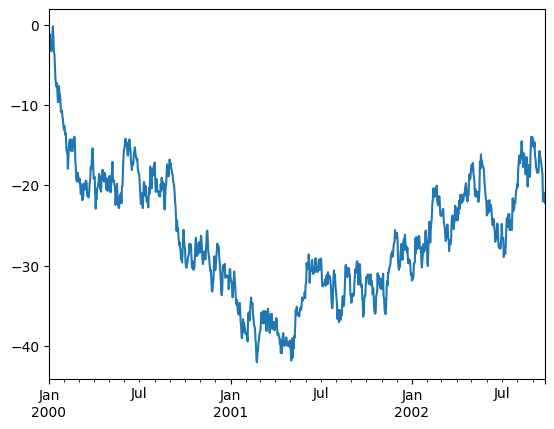

In [188]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [189]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [190]:
df = df.cumsum()

<Figure size 640x480 with 0 Axes>

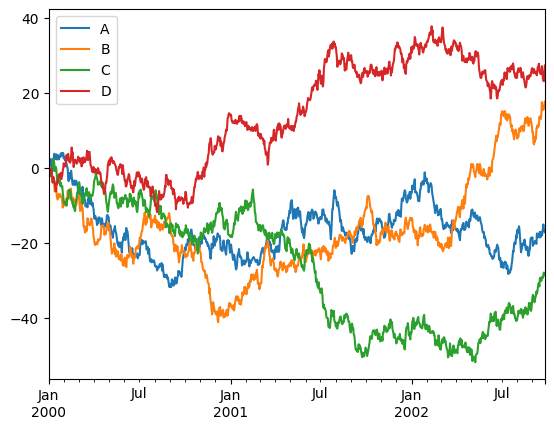

In [191]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [192]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [193]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.140674,-0.123143,0.107286,-0.542552
1,2000-01-02,-0.230264,0.149745,-1.330887,0.032114
2,2000-01-03,0.658671,-2.102353,-0.795748,-0.607288
3,2000-01-04,0.864107,-1.552122,-2.211110,-1.420260
4,2000-01-05,2.365377,-1.600340,-1.280495,-0.942495
...,...,...,...,...,...
995,2002-09-22,-16.112121,15.504662,-29.396651,23.924647
996,2002-09-23,-15.107086,15.647485,-28.530089,23.293100
997,2002-09-24,-16.766830,15.735809,-27.952401,23.209176
998,2002-09-25,-16.512585,16.461147,-28.339115,24.929670


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [197]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [139]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-0.067377,-0.035638,-0.021100,-0.752226
2000-01-02,-0.341526,0.867899,0.147792,-2.190171
2000-01-03,-0.118822,1.501776,-0.472641,-1.448117
2000-01-04,-0.727838,0.889072,-2.704155,-2.934499
2000-01-05,0.531075,1.073829,-2.847804,-2.517378
2000-01-06,0.091479,1.478376,-3.029743,-0.906359
2000-01-07,1.492265,2.113159,-3.549888,-2.117010
2000-01-08,1.851265,2.703705,-3.141079,0.079449
2000-01-09,2.213547,3.685811,-3.029953,1.620792
2000-01-10,2.028055,2.034899,-2.115068,3.566303
